## Unzipping the tiny-iamgenet-1k data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip -o "/content/drive/MyDrive/tiny-imagenet-200.zip" -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/tiny-imagenet-200/val/images/val_3979.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_3963.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_7199.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_2752.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_9687.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_9407.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_3603.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_3412.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_6982.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_8496.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_7332.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_9241.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_4196.JPEG  
  inflating: /content/tiny-imagenet-200/val/images/val_5980.JPEG  
  inflating

In [3]:
!ls /content/tiny-imagenet-200/

test  train  val  wnids.txt  words.txt


## Data loader without transformation

In [3]:
from data_loader import generate_train_val_loader
data_path = "/content/tiny-imagenet-200"  # or local path
train_loader, val_loader = generate_train_val_loader(data_path, batch_size=64,train_transform=True, test_transform=True)

✅ Validation folder reorganized successfully!


/content/data_augmentation.py:45: UserWarning: Argument(s) 'max_holes, max_height, max_width, min_holes, min_height, min_width, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


## Inspect the train loader

/usr/local/lib/python3.12/dist-packages/albumentations/augmentations/blur/functional.py:416: RuntimeWarning: divide by zero encountered in divide
  kernel_1d = np.exp(-0.5 * (x / sigma) ** 2)
/usr/local/lib/python3.12/dist-packages/albumentations/augmentations/blur/functional.py:416: RuntimeWarning: invalid value encountered in divide
  kernel_1d = np.exp(-0.5 * (x / sigma) ** 2)


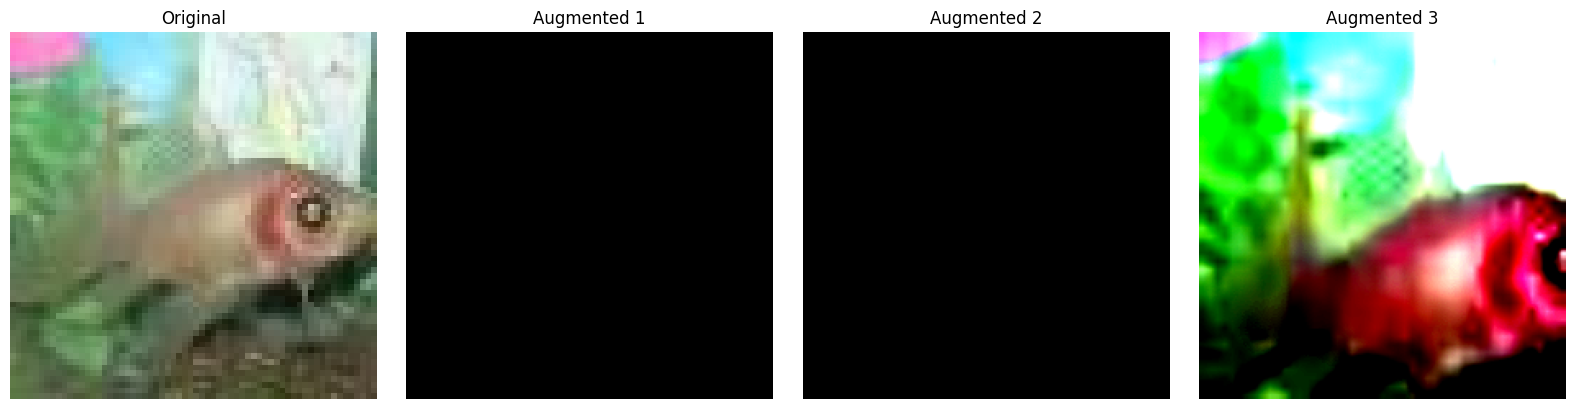

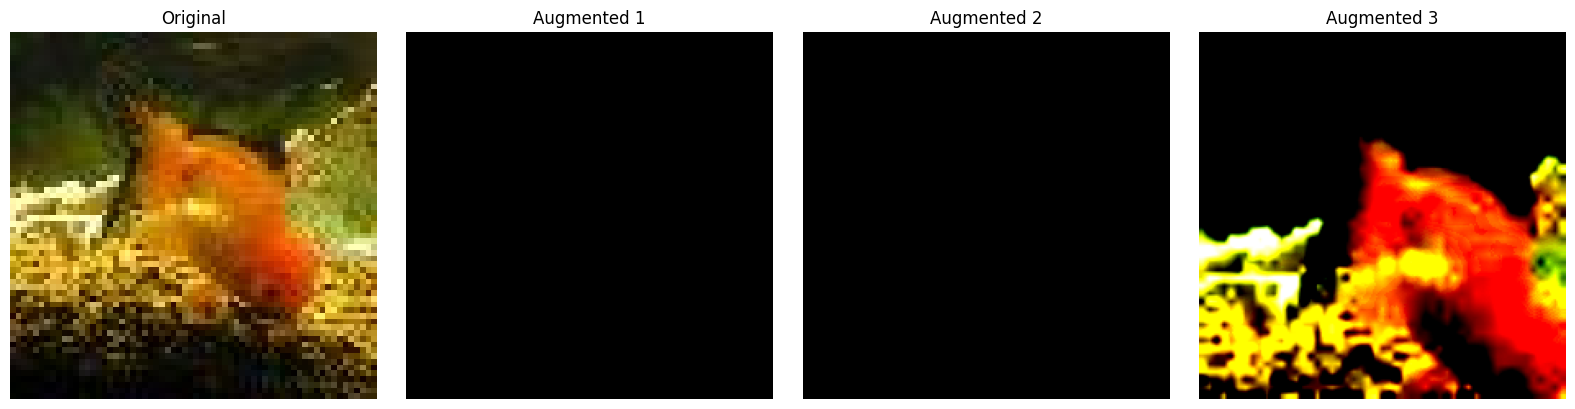

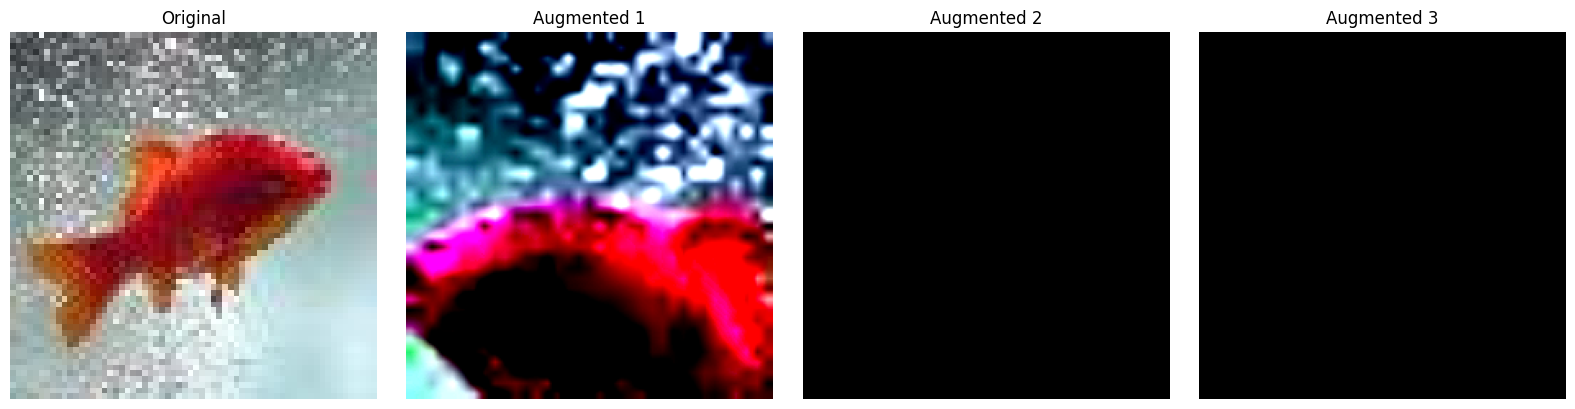

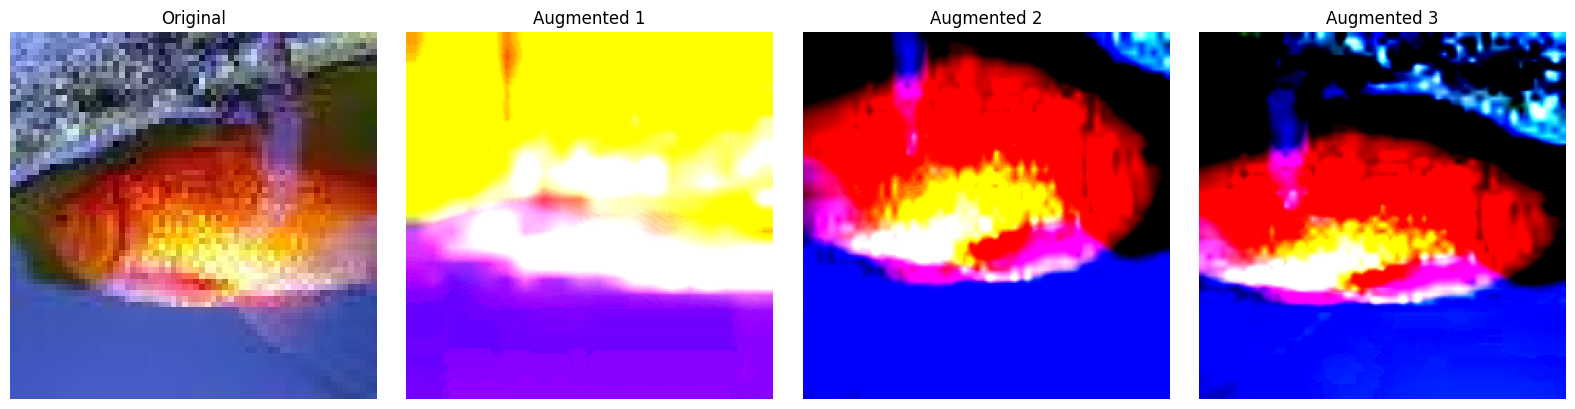

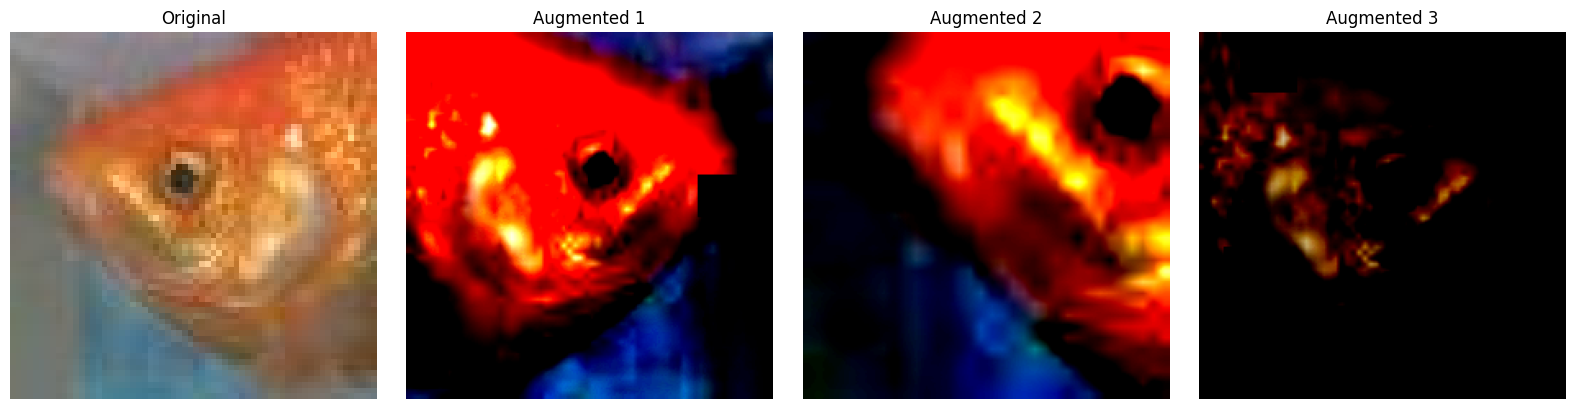

In [4]:
from utils import InspectImage
from data_augmentation import get_train_transform

words_file = "./tiny-imagenet-200/words.txt"

# Suppose train_dataset is AlbumentationsImageDataset
inspector = InspectImage(train_loader.dataset,words_file=words_file)
train_transform = get_train_transform()
inspector.show_augmented_images(train_transform, num_images=5, samples_per_image=3)

## Inspect the validation loader

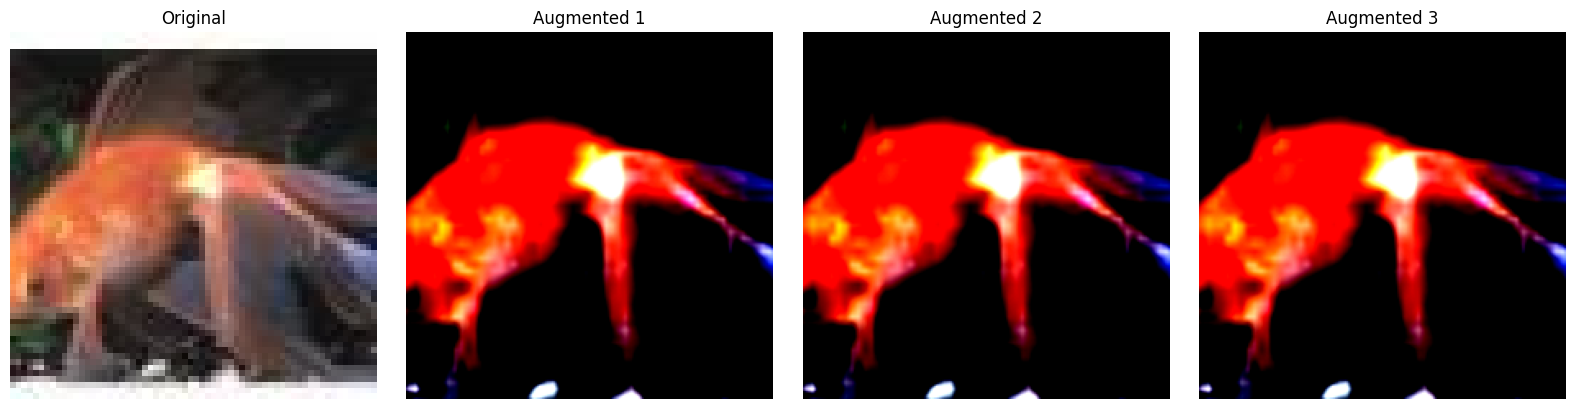

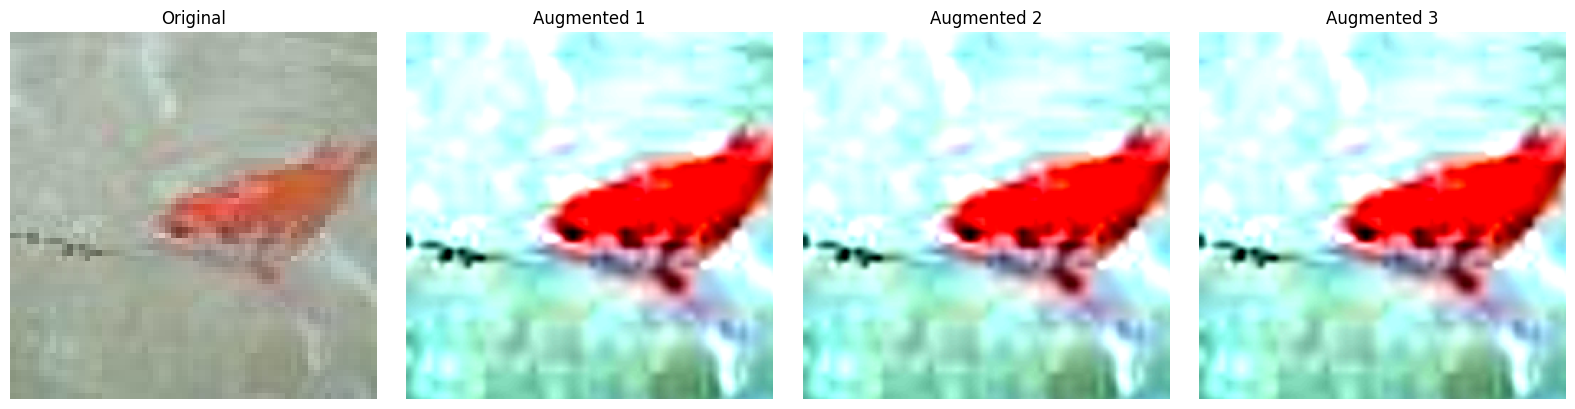

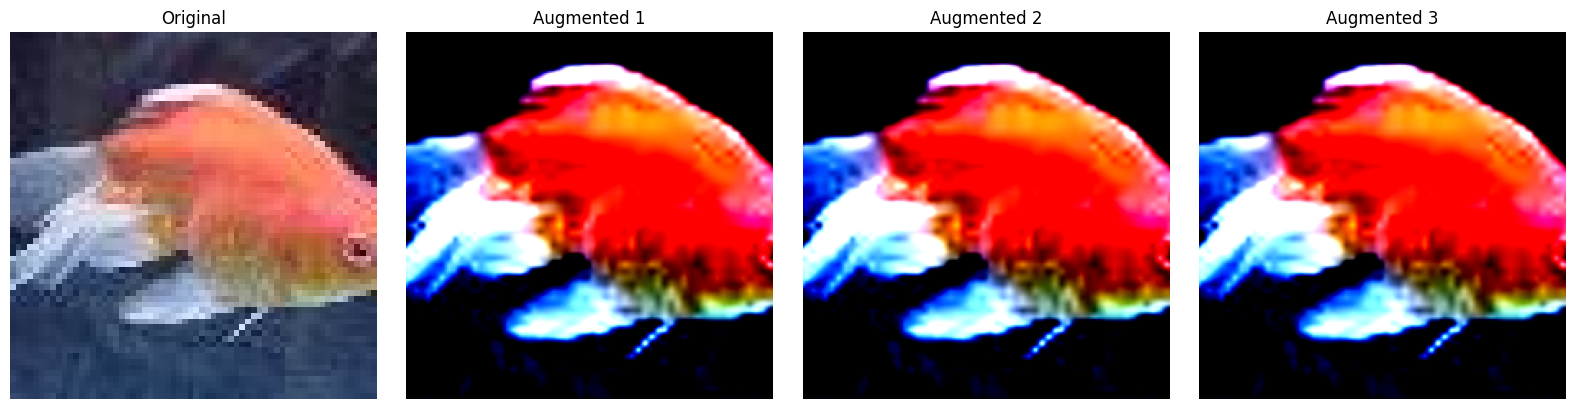

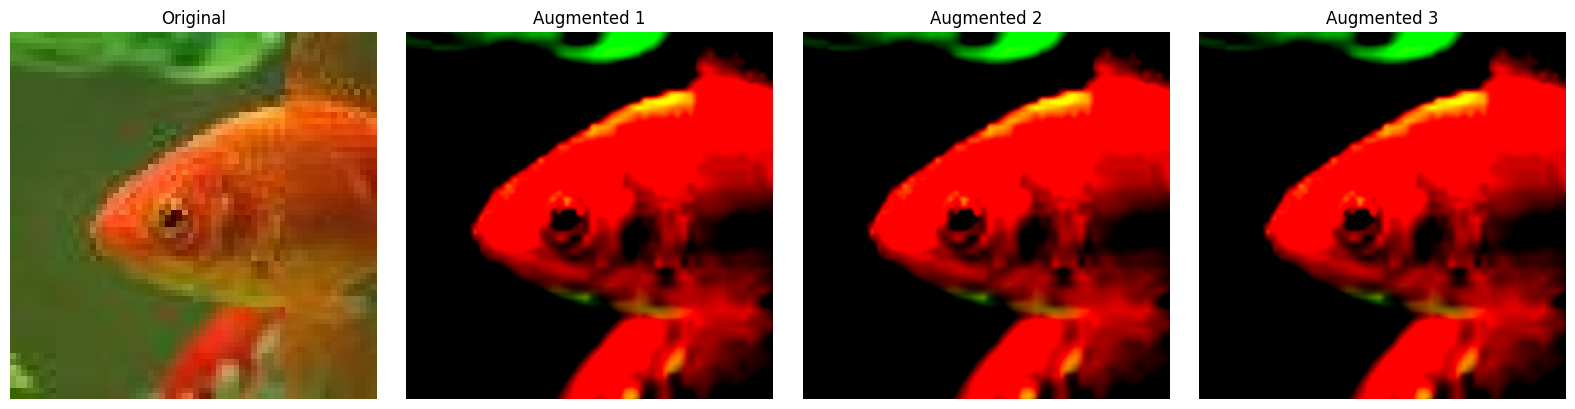

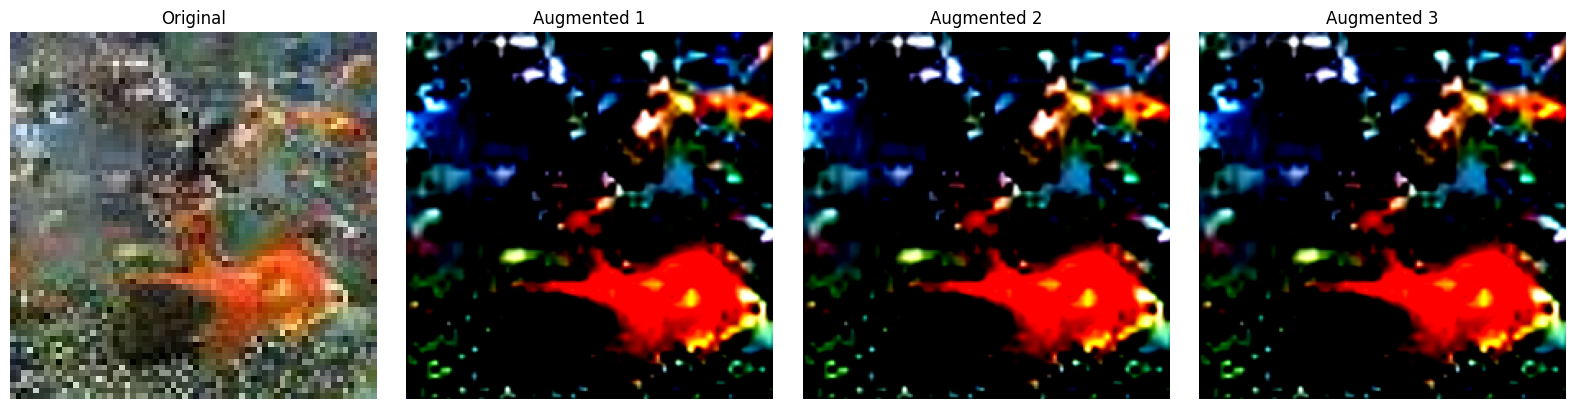

In [7]:
from utils import InspectImage
from data_augmentation import get_test_transform

words_file = "./tiny-imagenet-200/words.txt"

# Suppose train_dataset is AlbumentationsImageDataset
inspector = InspectImage(val_loader.dataset,words_file=words_file)
test_transform = get_test_transform()
inspector.show_augmented_images(test_transform, num_images=5, samples_per_image=3)

In [ ]:
from main import main
model, *metrics = main(
    data_path="/content/tiny-imagenet-200",
    zip_path="/content/drive/MyDrive/tiny-imagenet-200.zip",
    batch_size=8,  # adjust to your GPU memory
    num_epochs=2,
    learning_rate=0.1,
    inspect_data=True  # True to inspect dataset
)

🚀 ImageNet Training Pipeline - ResNet50 on Tiny ImageNet

[STEP 1/6] Checking dataset...
✓ Dataset found at: /content/tiny-imagenet-200

[STEP 2/6] Loading dataset and creating data loaders...
  - Batch size: 8
✓ Train loader: 100000 images, 12500 batches
✓ Val loader: 10000 images, 1250 batches

[STEP 3/6] Inspecting dataset...

===== Training Set =====
Total images: 100000
Class labels: ['n01443537', 'n01629819', 'n01641577', 'n01644900', 'n01698640', 'n01742172', 'n01768244', 'n01770393', 'n01774384', 'n01774750'] ... (showing first 10)
Total number of classes: 200
Number of images per class (first 10):
  goldfish: 500
  European fire salamander: 500
  bullfrog: 500
  tailed frog: 500
  American alligator: 500
  boa constrictor: 500
  trilobite: 500
  scorpion: 500
  black widow: 500
  tarantula: 500
Image size: (64, 64, 3)

[STEP 4/6] Initializing ResNet50 model...
  - Device: cuda
✓ Model created: ResNet50
  - Total parameters: 23,910,152
  - Trainable parameters: 23,910,152

[STE

Loss=6.9014434814453125 Batch_id=36 Accuracy=0.00:   0%|          | 37/12500 [00:40<3:46:19,  1.09s/it]